In [2]:
import pandas as pd
import numpy as np
import datetime

In [12]:
isee_machine = pd.read_csv('./data/isee_machine_middle_NG_inter_MapNorm_label.csv')

In [15]:
analy_col = [ 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4']

In [27]:
analy_col = [ 'CycleTime', 'VpPosition', 'VpTime',
        'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp',
          'Zone4']

## 상관관계 파악

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

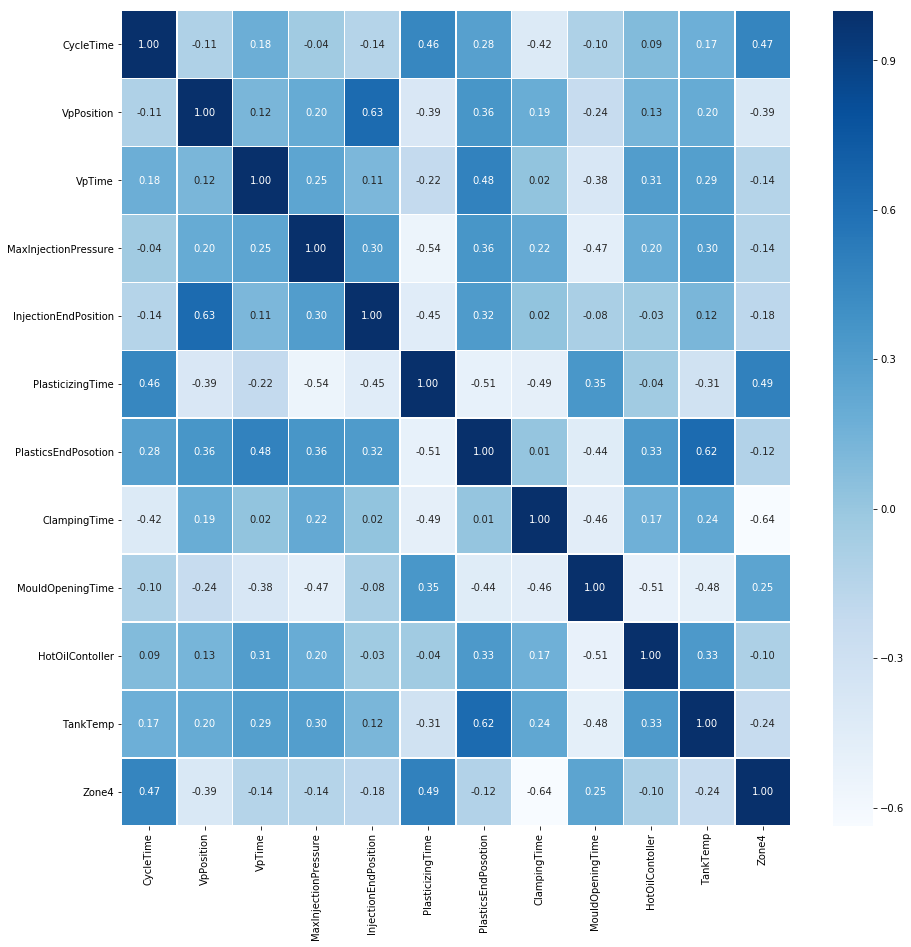

In [29]:
#### 정상인 것만 
corr = isee_machine[isee_machine['combined_label']==0][analy_col].corr()

plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [16]:
file2.columns

Index(['ModuleCount', 'creationTime', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4', 'creationDate'],
      dtype='object')

In [14]:
import import_ipynb
import isee_def

importing Jupyter notebook from isee_def.ipynb


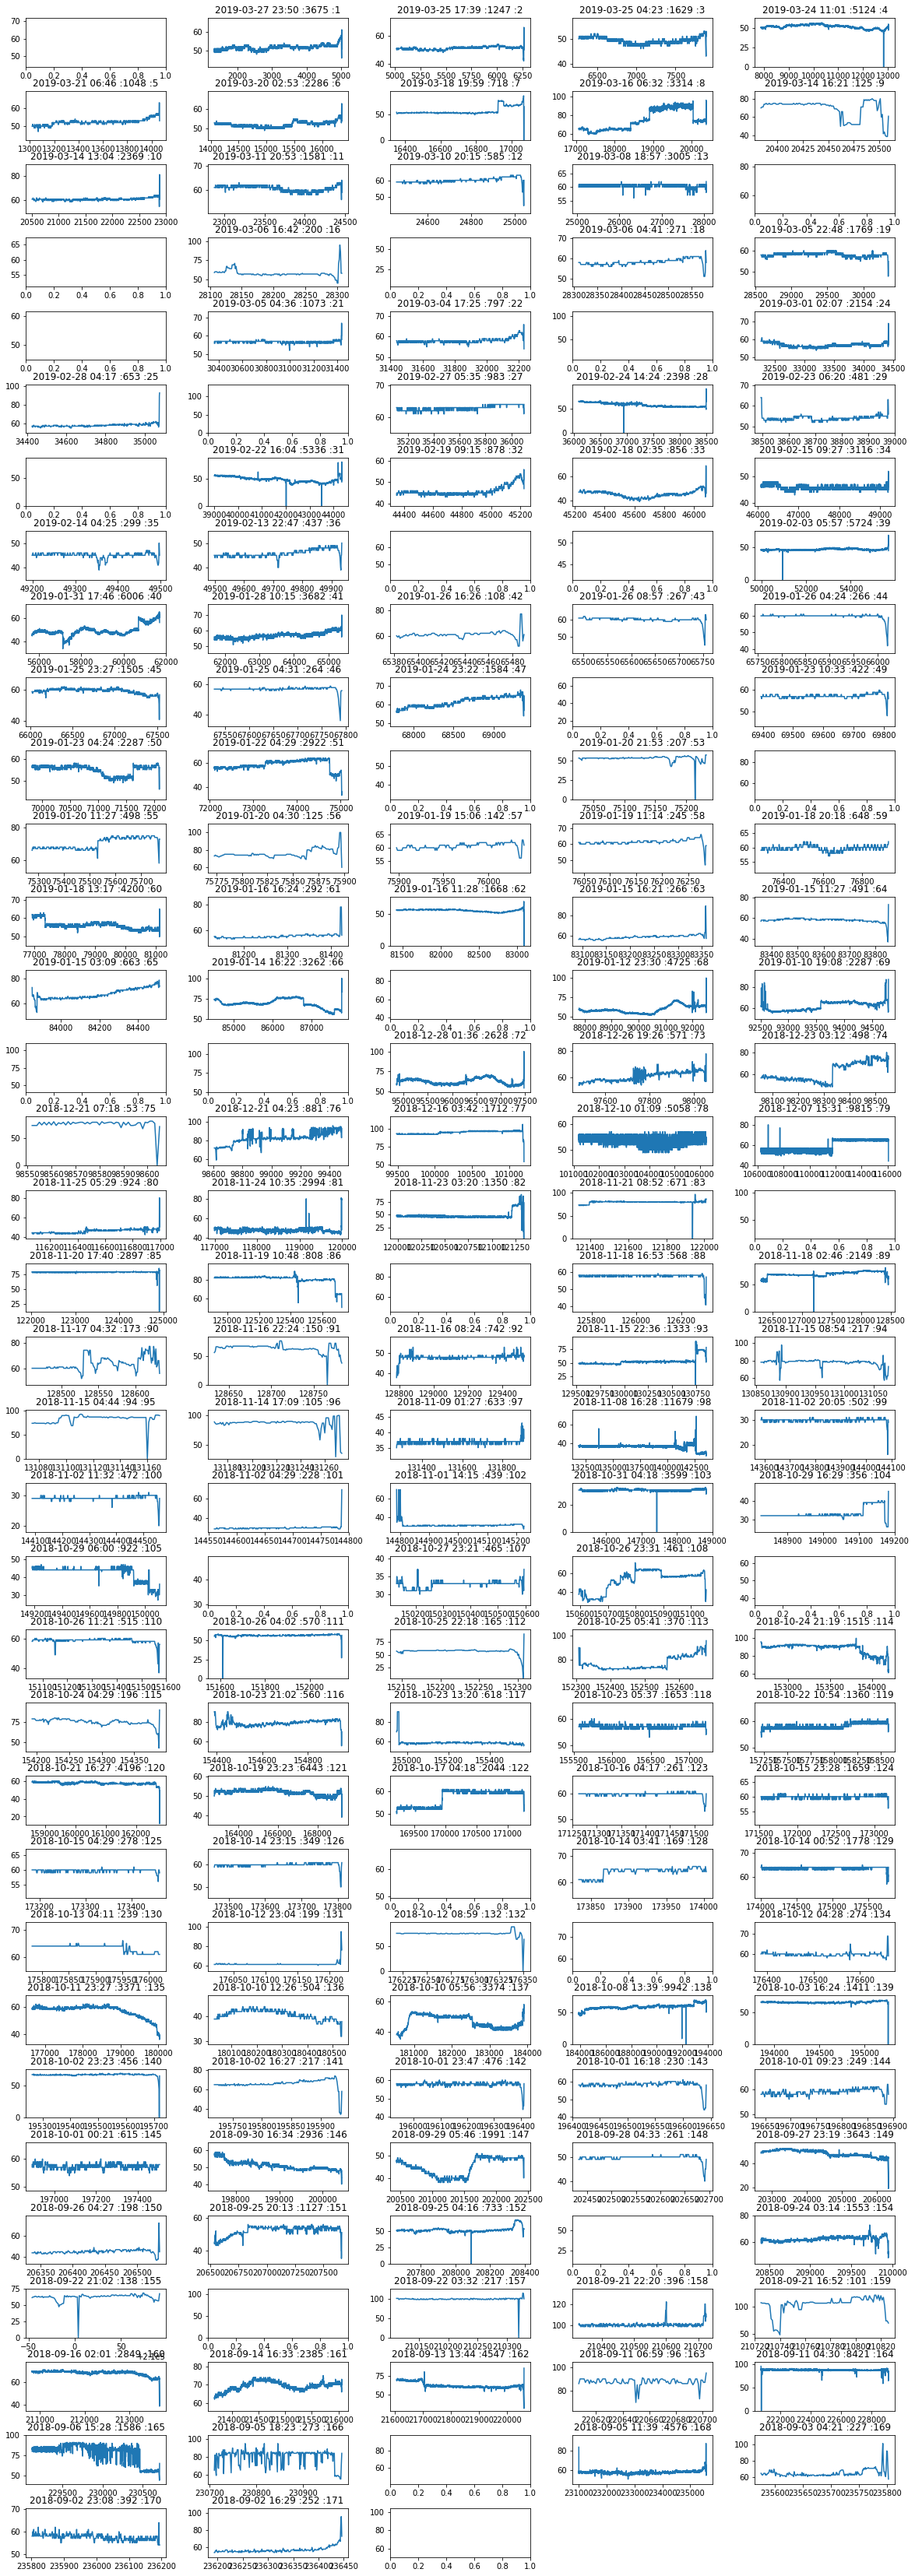

In [15]:
isee_def.plot_1column(file2, 'VpPressure', short_idx_list)

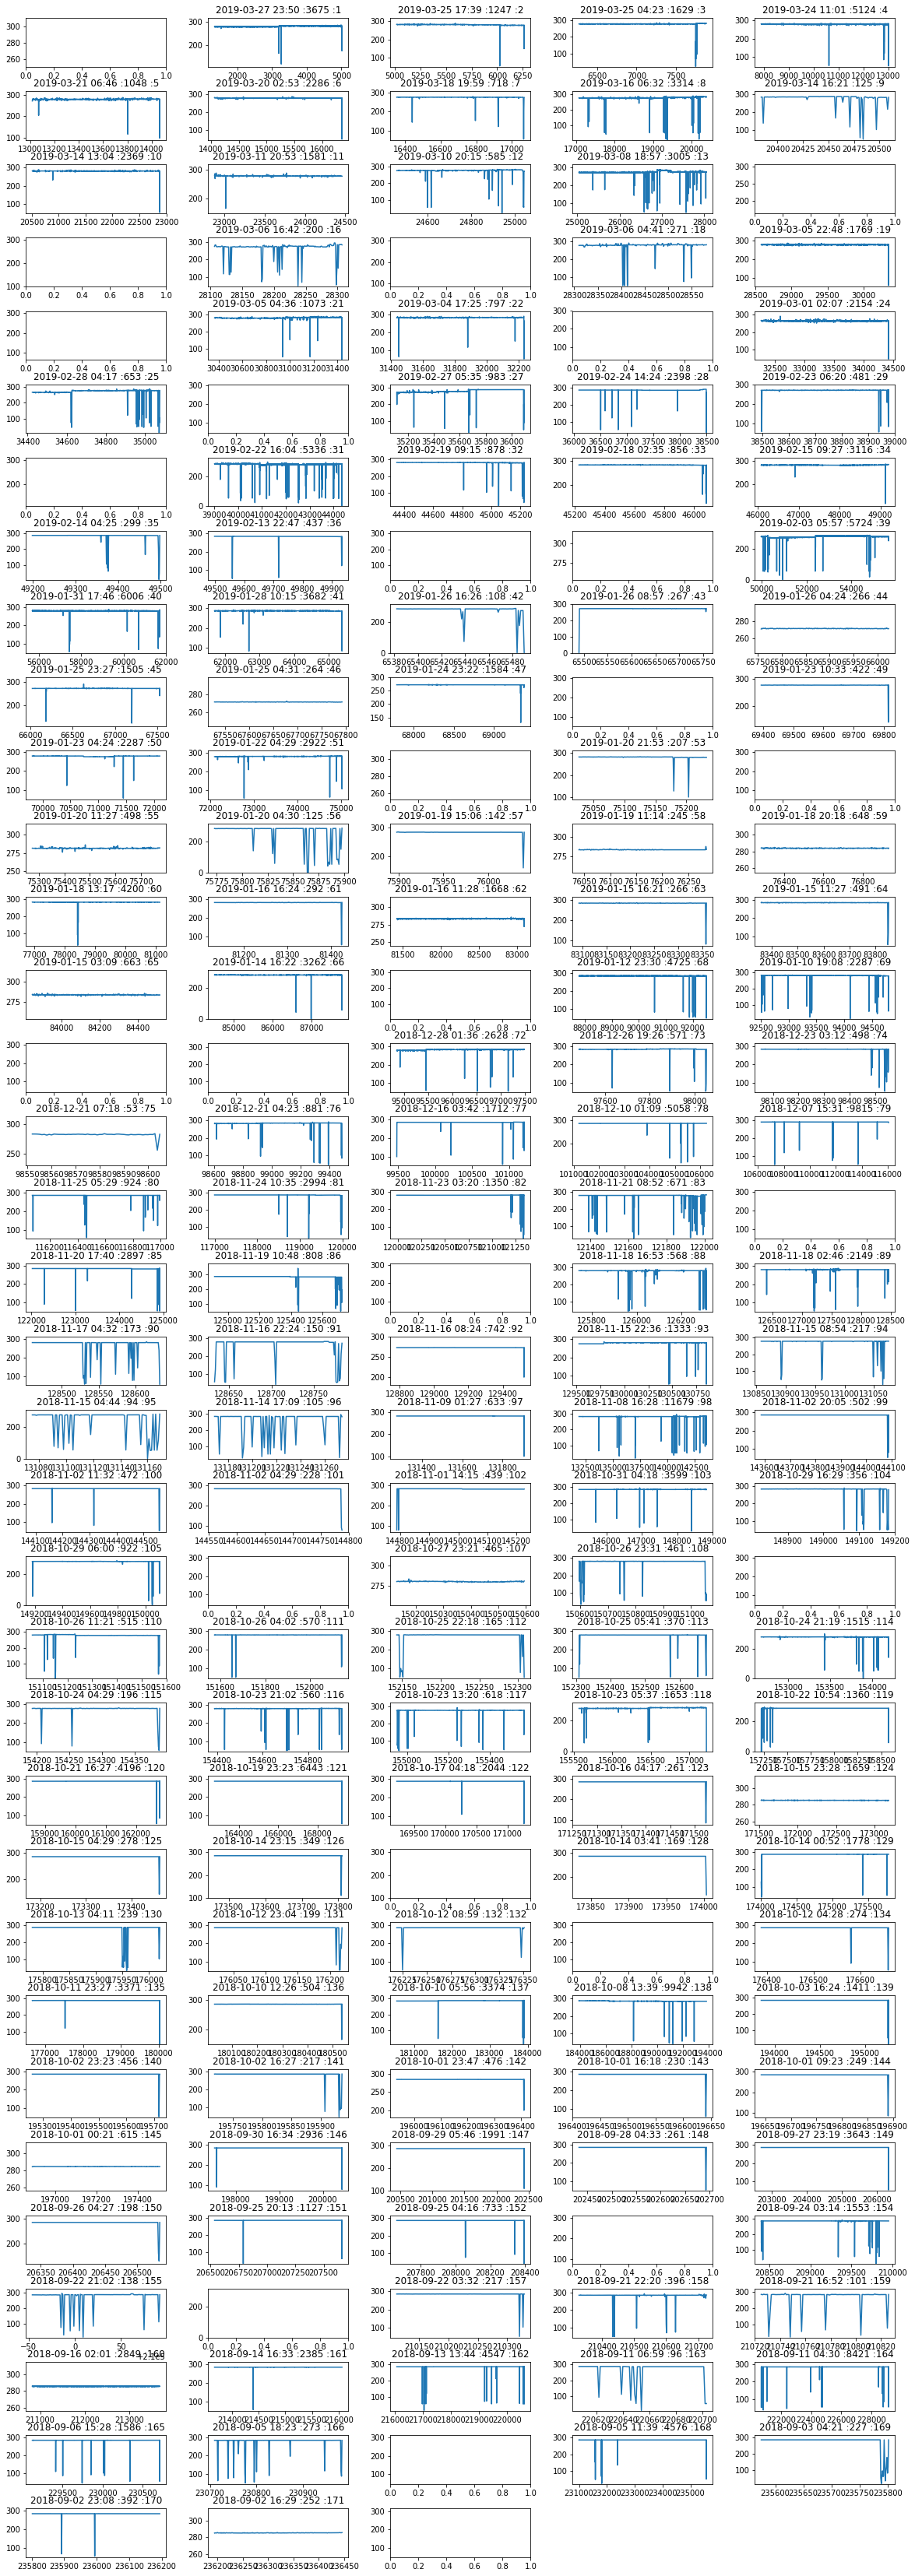

In [16]:
isee_def.plot_1column(file2, 'HotOilContoller', short_idx_list)

In [657]:
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter

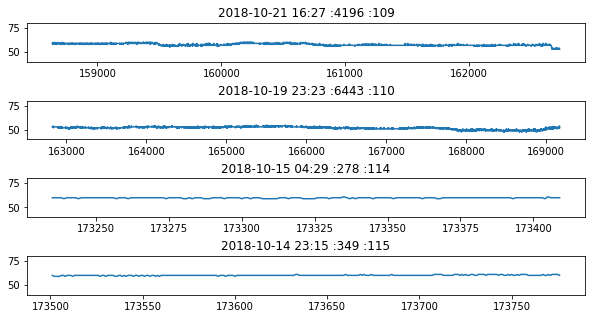

In [19]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1, wspace = 0.3)
x = 4  # 아래 v의 배수
q = 1

for n in [109, 110, 114, 115]:    
    v = 1   #가로 갯수
    
    df = file2.loc[idx_list[n]:idx_list[n+1]]
    first = idx_list[n+1]-1
    last = idx_list[n]
    after30 = df['creationTime'][first] + datetime.timedelta(minutes = 30)
    before30 = df['creationTime'][last] - datetime.timedelta(minutes = 30)
    df = df[(df['creationTime']< before30)&(df['creationTime']> after30)]
    
    ax =fig.add_subplot(x/v, v, q)
    ax.set_ylim([40, 80])
    ax.plot( df['VpPressure'])
    ax.set_title(file2['creationDate'][idx_list[n]]+' :'+str(idx_list[n+1]-idx_list[n])+' :'+ str(n))

    #ax.set_xticklabels(df['creationTime'], rotation=70)

    q += 1

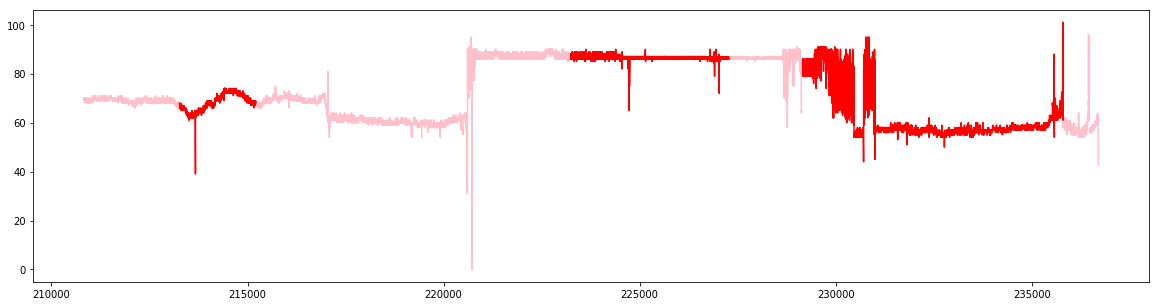

In [23]:
plt.figure(figsize=(20,5))
plt.plot(file2[file2['creationDate']=='2018-09-01']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-02']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-03']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-04']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-05']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-06']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-07']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-08']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-09']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-10']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-11']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-12']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-13']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-14']['VpPressure'], c='red')
plt.plot(file2[file2['creationDate']=='2018-09-15']['VpPressure'], c='pink')
plt.plot(file2[file2['creationDate']=='2018-09-16']['VpPressure'], c='pink')

In [ ]:
v2 = file2[file2['creationDate'] == '2018-09-03']

In [403]:
detect2 = v2[v2['creationTime']=='2018-09-03 18:22']
detect2

,ModuleCount,creationTime,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,ClampingTime,MouldOpeningTime,HotOilContoller,TankTemp,NozzleTemp,Zone1,Zone2,Zone3,Zone4,creationDate
234574,272284,2018-09-03 18:22,40.38,25.0,3.73,58,73,23.2,12.25,97.6,2.25,2.68,285.8,34,292,291,280,275,270,2018-09-03


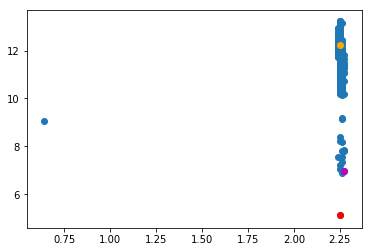

In [375]:
col1 = 'ClampingTime'
col2 = 'PlasticizingTime'

plt.scatter(v2[col1],v2[col2])
plt.scatter(file2.loc[235792][col1],file2.loc[235792][col2], c='red')
plt.scatter(f2.loc[235573][col1],f2.loc[235573][col2], c='m')
plt.scatter(detect2[col1],detect2[col2], c='orange')

### Multivariate Gaussian으로 그려보자

변수 두개만 가능

In [377]:
def estimateGaussian(X):
    n = np.size(X, 1)
    m = np.size(X, 0)
    mu = np.zeros((n, 1))
    sigma2 = np.zeros((n, 1))
    
    mu = np.reshape((1/m)*np.sum(X, 0), (1, n))
    sigma2 = np.reshape((1/m)*np.sum(np.power((X - mu),2), 0),(1, n))
    
    return mu, sigma2

In [407]:
X_test = v2.drop(['creationTime', 'ModuleCount', 'creationDate'], axis=1)
X_test

,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,ClampingTime,MouldOpeningTime,HotOilContoller,TankTemp,NozzleTemp,Zone1,Zone2,Zone3,Zone4
234104,40.37,25.0,3.71,57,74,16.3,12.22,97.7,2.25,2.69,285.4,33,289,292,280,275,270
234105,40.38,25.0,3.71,57,73,15.2,12.11,97.6,2.25,2.69,285.5,33,289,290,280,275,270
234106,40.37,25.0,3.71,58,73,23.7,12.48,97.7,2.25,2.68,285.7,33,289,290,280,275,270
234107,40.37,25.0,3.70,58,75,16.2,12.35,97.6,2.25,2.68,285.4,33,289,289,280,275,270
234108,40.37,25.0,3.71,58,75,16.8,12.40,97.6,2.25,2.68,285.3,33,289,289,280,275,270
234109,40.37,25.0,3.72,58,74,23.8,12.40,97.6,2.25,2.68,285.7,33,289,288,280,275,270
234110,40.38,25.0,3.72,58,74,22.8,12.51,97.6,2.25,2.68,285.8,33,289,289,280,275,270
234111,40.37,25.0,3.71,57,73,14.5,12.51,97.6,2.25,2.68,285.5,33,289,289,280,275,270
234112,40.38,25.0,3.72,58,74,22.6,12.45,97.7,2.25,2.69,285.7,33,289,289,280,275,270
234113,40.38,25.0,3.72,58,74,16.3,12.36,97.7,2.25,2.69,285.5,33,289,289,280,275,270


### Unsupervise Outlier Detection using Local Outlier Factor(LOF)

In [384]:
from sklearn.neighbors import LocalOutlierFactor

In [427]:
lof = LocalOutlierFactor(novelty=True)
model = lof.fit(X_train)
pred = model.predict(X_test)

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


In [428]:
view = X_test.copy()
view['pred'] = pred

In [429]:
view

,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,ClampingTime,MouldOpeningTime,HotOilContoller,TankTemp,NozzleTemp,Zone1,Zone2,Zone3,Zone4,pred
234104,40.37,25.0,3.71,57,74,16.3,12.22,97.7,2.25,2.69,285.4,33,289,292,280,275,270,-1
234105,40.38,25.0,3.71,57,73,15.2,12.11,97.6,2.25,2.69,285.5,33,289,290,280,275,270,1
234106,40.37,25.0,3.71,58,73,23.7,12.48,97.7,2.25,2.68,285.7,33,289,290,280,275,270,1
234107,40.37,25.0,3.70,58,75,16.2,12.35,97.6,2.25,2.68,285.4,33,289,289,280,275,270,1
234108,40.37,25.0,3.71,58,75,16.8,12.40,97.6,2.25,2.68,285.3,33,289,289,280,275,270,1
234109,40.37,25.0,3.72,58,74,23.8,12.40,97.6,2.25,2.68,285.7,33,289,288,280,275,270,1
234110,40.38,25.0,3.72,58,74,22.8,12.51,97.6,2.25,2.68,285.8,33,289,289,280,275,270,1
234111,40.37,25.0,3.71,57,73,14.5,12.51,97.6,2.25,2.68,285.5,33,289,289,280,275,270,1
234112,40.38,25.0,3.72,58,74,22.6,12.45,97.7,2.25,2.69,285.7,33,289,289,280,275,270,1
234113,40.38,25.0,3.72,58,74,16.3,12.36,97.7,2.25,2.69,285.5,33,289,289,280,275,270,1


In [430]:
normal = view[view['pred']==1]  # 정상
abnormal = view[view['pred']==-1]  # 이상

In [24]:
col1 = 'ClampingTime'
col2 = 'PlasticizingTime'

plt.figure(figsize=(10,10))

#plt.scatter(w2[col1],w2[col2], c='pink')
plt.scatter(normal[col1],normal[col2], c='gold')
plt.scatter(abnormal[col1],abnormal[col2], c='skyblue')
plt.scatter(file2.loc[235792][col1],file2.loc[235792][col2], c='red')
plt.scatter(f2.loc[235573][col1],f2.loc[235573][col2], c='m')
plt.scatter(detect2[col1],detect2[col2], c='orange')

NameError: name 'normal' is not defined

<Figure size 720x720 with 0 Axes>

In [437]:
view.loc[234574]

CycleTime                40.38
VpPosition               25.00
VpTime                    3.73
VpPressure               58.00
MaxInjectionPressure     73.00
InjectionEndPosition     23.20
PlasticizingTime         12.25
PlasticsEndPosotion      97.60
ClampingTime              2.25
MouldOpeningTime          2.68
HotOilContoller         285.80
TankTemp                 34.00
NozzleTemp              292.00
Zone1                   291.00
Zone2                   280.00
Zone3                   275.00
Zone4                   270.00
pred                      1.00
Name: 234574, dtype: float64

### PCA로 그려보자

모든 변수의 상관관계가 낮아 pca로 줄일 수 없음 -> 차원 줄일 시, 설명력이 매우 떨어짐

In [345]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe = Pipeline(steps= 
                [('scaler', StandardScaler()),
                 ('pca_3', PCA(n_components=3))])

target_df = file2[file2['creationDate'] == '2018-09-03']

train_dataset = target_df[['ModuleCount', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4']]

### 선형 pca 학습
X_reduced = pipe.fit_transform(train_dataset)
sum(pipe.named_steps['pca_3'].explained_variance_ratio_)

In [383]:
X = v2.drop(['creationTime', 'ModuleCount','creationDate'], axis=1)
mu, sigma2 = estimateGaussian(X)

ValueError: Length of passed values is 1, index implies 17

In [359]:
pipe = Pipeline(steps= 
                [('scaler', StandardScaler()),
                 ('pca_3', PCA(n_components=3))])

In [355]:
target_df = file2[file2['creationDate'] == '2018-09-03']

In [356]:
train_dataset = target_df[['ModuleCount', 'CycleTime', 'VpPosition', 'VpTime',
       'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
       'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
       'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
       'Zone1', 'Zone2', 'Zone3', 'Zone4']]

In [360]:
### 선형 pca 학습
X_reduced = pipe.fit_transform(train_dataset)
sum(pipe.named_steps['pca_3'].explained_variance_ratio_)

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.5786028886550192